In [99]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels import robust
from scipy.spatial import distance


players = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/players.csv")
players

player_play = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/player_play.csv")
player_play

plays = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/plays.csv")
plays

plays_df = plays.dropna(subset=['pff_manZone'])

In [100]:
tracking1 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_1.csv")
tracking2 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_2.csv")
tracking3 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_3.csv")
tracking4 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_4.csv")
tracking5 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_5.csv")
tracking6 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_6.csv")
tracking7 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_7.csv")
tracking8 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_8.csv")
tracking9 = pd.read_csv("/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_9.csv")

dfs = [] 
file_list = ["/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_1.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_2.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_3.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_4.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_5.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_6.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_7.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_8.csv",
             "/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/tracking_week_9.csv"]
for file in file_list:
    data = pd.read_csv(file)
    dfs.append(data) 
tracking_df = pd.concat(dfs, ignore_index=True)
tracking_df.columns

: 

: 

In [4]:
# Tracking data = tracking_df
# Play Data = plays_df
# Results of each player per play = player_play.columns
# Player data = players

pass_plays_df = plays_df.dropna(subset=['passResult'])
player_play[player_play['pressureAllowedAsBlocker'] != np.nan]

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
0,2022090800,56,35472,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2022090800,56,42392,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2022090800,56,42489,BUF,0,0,0,0,0,1,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022090800,56,44875,BUF,0,0,0,0,0,0,...,NaN,NaN,43335.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2022090800,56,44985,BUF,0,0,0,0,0,0,...,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354722,2022110700,3787,52666,NO,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354723,2022110700,3787,52942,NO,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354724,2022110700,3787,53098,NO,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354725,2022110700,3787,54476,NO,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pass_plays_df.columns
player_play[player_play['pressureAllowedAsBlocker'] != np.nan]
player_play = player_play.rename(columns={'nflId': 'nflId_x'})
player_play

,gameId,playId,nflId_x,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,wasRunningRoute,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId
0,2022090800,56,35472,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2022090800,56,42392,BUF,0,0,0,0,0,0,...,NaN,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2022090800,56,42489,BUF,0,0,0,0,0,1,...,1.0,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022090800,56,44875,BUF,0,0,0,0,0,0,...,NaN,NaN,43335.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,2022090800,56,44985,BUF,0,0,0,0,0,0,...,1.0,OUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354722,2022110700,3787,52666,NO,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354723,2022110700,3787,52942,NO,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354724,2022110700,3787,53098,NO,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354725,2022110700,3787,54476,NO,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def check_tte_and_position(row):
  """
  Checks if the 'pressureAllowedAsBlocker' is not NaN and the 'position' is 'TE'.

  Args:
    row: A single row of the DataFrame.

  Returns:
    True if both conditions are met, False otherwise.
  """
  return not pd.isna(row['pressureAllowedAsBlocker']) and row['position'] == 'TE'

# Assuming 'player_plays' is your DataFrame
# player_play['is_tte_and_te'] = player_play.apply(check_tte_and_position, axis=1)

# # Convert boolean values to 1/0 (optional)
# player_play['is_tte_and_te'] = player_play['is_tte_and_te'].astype(int)

In [16]:
player_play.columns

Index(['gameId', 'playId', 'nflId_x', 'teamAbbr', 'hadRushAttempt',
       'rushingYards', 'hadDropback', 'passingYards', 'sackYardsAsOffense',
       'hadPassReception', 'receivingYards', 'wasTargettedReceiver',
       'yardageGainedAfterTheCatch', 'fumbles', 'fumbleLost',
       'fumbleOutOfBounds', 'assistedTackle', 'forcedFumbleAsDefense',
       'halfSackYardsAsDefense', 'passDefensed', 'quarterbackHit',
       'sackYardsAsDefense', 'safetyAsDefense', 'soloTackle', 'tackleAssist',
       'tackleForALoss', 'tackleForALossYardage', 'hadInterception',
       'interceptionYards', 'fumbleRecoveries', 'fumbleRecoveryYards',
       'penaltyYards', 'penaltyNames', 'wasInitialPassRusher',
       'causedPressure', 'timeToPressureAsPassRusher',
       'getOffTimeAsPassRusher', 'inMotionAtBallSnap', 'shiftSinceLineset',
       'motionSinceLineset', 'wasRunningRoute', 'routeRan',
       'blockedPlayerNFLId1', 'blockedPlayerNFLId2', 'blockedPlayerNFLId3',
       'pressureAllowedAsBlocker', 'tim

In [17]:
pass_plays_df.columns
player_play_subset = player_play[['gameId', 'playId', 'nflId_x', 'pressureAllowedAsBlocker']]

play_data = tracking_df.merge(players, on='displayName', how='left')
play_data = play_data.drop(columns = ['collegeName', 'birthDate', 'weight', 'height', 'jerseyNumber'])
play_data_no_post_snap = play_data[play_data['frameType'] != 'AFTER_SNAP']

play_data_no_post_snap.merge(player_play_subset, on = ['gameId', 'playId', 'nflId_x'], how='left')
# judge wether the te would block based on distance to nearest player, distance to nearest teammate
play_data_no_post_snap['nflId_x'] = play_data_no_post_snap['nflId_x'].fillna(-1).astype(int)

play_data_no_post_snap # Everything before the snap


/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_21462/2618104680.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  play_data_no_post_snap['nflId_x'] = play_data_no_post_snap['nflId_x'].fillna(-1).astype(int)


,gameId,playId,nflId_x,displayName,frameId,frameType,time,club,playDirection,x,y,s,a,dis,o,dir,event,nflId_y,position
0,2022091200,64,35459,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,DEN,right,51.060000,28.550000,0.72,0.37,0.07,246.17,68.34,huddle_break_offense,35459.0,SS
1,2022091200,64,35459,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,DEN,right,51.130000,28.570000,0.71,0.36,0.07,245.41,71.21,NaN,35459.0,SS
2,2022091200,64,35459,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,DEN,right,51.200000,28.590000,0.69,0.23,0.07,244.45,69.90,NaN,35459.0,SS
3,2022091200,64,35459,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,DEN,right,51.260000,28.620000,0.67,0.22,0.07,244.45,67.98,NaN,35459.0,SS
4,2022091200,64,35459,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,DEN,right,51.320000,28.650000,0.65,0.34,0.07,245.74,62.83,NaN,35459.0,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60026952,2022110300,3579,-1,football,22,BEFORE_SNAP,2022-11-04 03:04:34,football,left,74.800003,29.850000,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
60026953,2022110300,3579,-1,football,23,BEFORE_SNAP,2022-11-04 03:04:34.1,football,left,74.800003,29.850000,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
60026954,2022110300,3579,-1,football,24,BEFORE_SNAP,2022-11-04 03:04:34.2,football,left,74.800003,29.850000,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
60026955,2022110300,3579,-1,football,25,BEFORE_SNAP,2022-11-04 03:04:34.3,football,left,74.800003,29.860001,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [94]:
#play_data_no_post_snap.columns
player_play_subset
play_data_no_post_snap = play_data_no_post_snap.merge(player_play_subset, on = ['gameId', 'playId', 'nflId_x'], how='left')
play_data_no_post_snap

,gameId,playId,nflId_x,displayName,frameId,frameType,time,club,playDirection,x,...,s,a,dis,o,dir,event,nflId_y,position,timeToPressureAllowedAsBlocker_x,timeToPressureAllowedAsBlocker_y
0,2022091200,64,35459,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,DEN,right,51.060000,...,0.72,0.37,0.07,246.17,68.34,huddle_break_offense,35459.0,SS,NaN,NaN
1,2022091200,64,35459,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,DEN,right,51.130000,...,0.71,0.36,0.07,245.41,71.21,NaN,35459.0,SS,NaN,NaN
2,2022091200,64,35459,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,DEN,right,51.200000,...,0.69,0.23,0.07,244.45,69.90,NaN,35459.0,SS,NaN,NaN
3,2022091200,64,35459,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,DEN,right,51.260000,...,0.67,0.22,0.07,244.45,67.98,NaN,35459.0,SS,NaN,NaN
4,2022091200,64,35459,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,DEN,right,51.320000,...,0.65,0.34,0.07,245.74,62.83,NaN,35459.0,SS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39635194,2022110300,3579,-1,football,22,BEFORE_SNAP,2022-11-04 03:04:34,football,left,74.800003,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39635195,2022110300,3579,-1,football,23,BEFORE_SNAP,2022-11-04 03:04:34.1,football,left,74.800003,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39635196,2022110300,3579,-1,football,24,BEFORE_SNAP,2022-11-04 03:04:34.2,football,left,74.800003,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39635197,2022110300,3579,-1,football,25,BEFORE_SNAP,2022-11-04 03:04:34.3,football,left,74.800003,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
filtered_play_data = play_data_no_post_snap.merge(
    pass_plays_df[['gameId', 'playId']],  
    on=['gameId', 'playId'], 
    how='inner' 
)
raiders = filtered_play_data[filtered_play_data['club'] == 'LV']
raiders
raiders_te = raiders[raiders['position'] == 'TE']
raiders_te
# df1 = play_data_no_post_snap.iloc[0:300000]
# df1

,gameId,playId,nflId_x,displayName,frameId,frameType,time,club,playDirection,x,...,s,a,dis,o,dir,event,nflId_y,position,timeToPressureAllowedAsBlocker_x,timeToPressureAllowedAsBlocker_y
684127,2022091111,336,42547,Darren Waller,1,BEFORE_SNAP,2022-09-11 20:35:31.6,LV,left,88.92,...,2.40,1.11,0.25,308.01,321.30,huddle_break_offense,42547.0,TE,NaN,NaN
684128,2022091111,336,42547,Darren Waller,2,BEFORE_SNAP,2022-09-11 20:35:31.7,LV,left,88.77,...,2.25,1.43,0.23,308.97,321.88,NaN,42547.0,TE,NaN,NaN
684129,2022091111,336,42547,Darren Waller,3,BEFORE_SNAP,2022-09-11 20:35:31.8,LV,left,88.64,...,2.08,1.60,0.22,310.06,321.87,NaN,42547.0,TE,NaN,NaN
684130,2022091111,336,42547,Darren Waller,4,BEFORE_SNAP,2022-09-11 20:35:31.9,LV,left,88.52,...,1.93,1.58,0.20,310.06,321.83,NaN,42547.0,TE,NaN,NaN
684131,2022091111,336,42547,Darren Waller,5,BEFORE_SNAP,2022-09-11 20:35:32,LV,left,88.40,...,1.80,1.42,0.19,309.40,322.96,NaN,42547.0,TE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23413406,2022110604,3831,47920,Foster Moreau,34,BEFORE_SNAP,2022-11-06 21:06:52.3,LV,left,87.53,...,0.01,0.01,0.00,298.04,42.52,NaN,47920.0,TE,NaN,NaN
23413407,2022110604,3831,47920,Foster Moreau,35,BEFORE_SNAP,2022-11-06 21:06:52.4,LV,left,87.53,...,0.00,0.01,0.00,296.89,40.30,NaN,47920.0,TE,NaN,NaN
23413408,2022110604,3831,47920,Foster Moreau,36,BEFORE_SNAP,2022-11-06 21:06:52.5,LV,left,87.52,...,0.00,0.00,0.01,295.51,36.72,NaN,47920.0,TE,NaN,NaN
23413409,2022110604,3831,47920,Foster Moreau,37,BEFORE_SNAP,2022-11-06 21:06:52.6,LV,left,87.52,...,0.02,0.27,0.00,295.51,283.50,NaN,47920.0,TE,NaN,NaN


In [21]:
def track_nearest_te_and_defender(frame_data, game_id, play_id):
    """
    Tracks the nearest teammate and nearest defender for the TE in a given gameId and playId.

    Parameters:
    - frame_data (DataFrame): Full dataset containing all frames for multiple games and plays.
    - game_id (int): The specific gameId to process.
    - play_id (int): The specific playId to process.

    Returns:
    - DataFrame: Processed data with columns for closest teammate and defender distances and IDs.
    """
    play_data = frame_data[(frame_data['gameId'] == game_id) & (frame_data['playId'] == play_id)].copy()
    
    play_data['closest_teammate_distance'] = np.nan
    play_data['closest_teammate_position'] = np.nan
    play_data['closest_defender_distance'] = np.nan
    play_data['closest_defender_position'] = np.nan

    te_data = play_data[play_data['position'] == 'TE']

    if te_data.empty:
        return play_data
    
    te_team = te_data['club'].iloc[0] 
    
    offensive_players = play_data[play_data['club'] == te_team]
    defensive_players = play_data[(play_data['club'] != te_team) & (play_data['club'] != 'football')]

    for index, row in play_data.iterrows():
        if row['position'] == 'TE':  
            teammates = offensive_players[offensive_players['nflId_x'] != row['nflId_x']]
            if not teammates.empty:
                teammate_distances = teammates.apply(
                    lambda teammate: distance.euclidean(
                        (row['x'], row['y']),
                        (teammate['x'], teammate['y'])
                    ),
                    axis=1
                )
                closest_teammate_index = teammate_distances.idxmin()
                closest_teammate = teammates.loc[closest_teammate_index]

                play_data.at[index, 'closest_teammate_distance'] = teammate_distances[closest_teammate_index]
                play_data.at[index, 'closest_teammate_position'] = closest_teammate['position']

            if not defensive_players.empty:
                defender_distances = defensive_players.apply(
                    lambda defender: distance.euclidean(
                        (row['x'], row['y']),
                        (defender['x'], defender['y'])
                    ),
                    axis=1
                )
                closest_defender_index = defender_distances.idxmin()
                closest_defender = defensive_players.loc[closest_defender_index]

                play_data.at[index, 'closest_defender_distance'] = defender_distances[closest_defender_index]
                play_data.at[index, 'closest_defender_position'] = closest_defender['position']

    return play_data

In [ ]:
processed_play_data = track_nearest_te_and_defender(filtered_play_data, game_id=2022110609, play_id=339)
#processed_play_data[processed_play_data['position'] == 'TE']
processed_play_data

In [ ]:
processed_play_data

# for each unique gameId / playId combination, i want you to add

In [96]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

raiders[['closest_teammate_distance', 'closest_teammate_position', 
                    'closest_defender_distance', 'closest_defender_position']] = np.nan

# filtered_play_data
raiders

raiders_te[['closest_teammate_distance', 'closest_teammate_position', 
                    'closest_defender_distance', 'closest_defender_position']] = np.nan

# filtered_play_data
raiders_te

/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_21462/963643134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raiders[['closest_teammate_distance', 'closest_teammate_position',
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_21462/963643134.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raiders[['closest_teammate_distance', 'closest_teammate_position',
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_21462/963643134.py:4: SettingWithCopyWarning: 
A value is trying 

,gameId,playId,nflId_x,displayName,frameId,frameType,time,club,playDirection,x,...,dir,event,nflId_y,position,timeToPressureAllowedAsBlocker_x,timeToPressureAllowedAsBlocker_y,closest_teammate_distance,closest_teammate_position,closest_defender_distance,closest_defender_position
684127,2022091111,336,42547,Darren Waller,1,BEFORE_SNAP,2022-09-11 20:35:31.6,LV,left,88.92,...,321.30,huddle_break_offense,42547.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
684128,2022091111,336,42547,Darren Waller,2,BEFORE_SNAP,2022-09-11 20:35:31.7,LV,left,88.77,...,321.88,NaN,42547.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
684129,2022091111,336,42547,Darren Waller,3,BEFORE_SNAP,2022-09-11 20:35:31.8,LV,left,88.64,...,321.87,NaN,42547.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
684130,2022091111,336,42547,Darren Waller,4,BEFORE_SNAP,2022-09-11 20:35:31.9,LV,left,88.52,...,321.83,NaN,42547.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
684131,2022091111,336,42547,Darren Waller,5,BEFORE_SNAP,2022-09-11 20:35:32,LV,left,88.40,...,322.96,NaN,42547.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23413406,2022110604,3831,47920,Foster Moreau,34,BEFORE_SNAP,2022-11-06 21:06:52.3,LV,left,87.53,...,42.52,NaN,47920.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
23413407,2022110604,3831,47920,Foster Moreau,35,BEFORE_SNAP,2022-11-06 21:06:52.4,LV,left,87.53,...,40.30,NaN,47920.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
23413408,2022110604,3831,47920,Foster Moreau,36,BEFORE_SNAP,2022-11-06 21:06:52.5,LV,left,87.52,...,36.72,NaN,47920.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
23413409,2022110604,3831,47920,Foster Moreau,37,BEFORE_SNAP,2022-11-06 21:06:52.6,LV,left,87.52,...,283.50,NaN,47920.0,TE,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

processed_data = []

unique_combinations = raiders_te[['gameId', 'playId']].drop_duplicates()

for game_id in unique_combinations['gameId'].unique():
    play_ids = unique_combinations[unique_combinations['gameId'] == game_id]['playId']
    
    for play_id in play_ids:
        play_data = raiders_te[(raiders_te['gameId'] == game_id) &
                                       (raiders['playId'] == play_id)]
        
        processed_frame_data = track_nearest_te_and_defender(
            frame_data=play_data, 
            game_id=game_id, 
            play_id=play_id
        )
        
        processed_data.append(processed_frame_data)

final_processed_data = pd.concat(processed_data, ignore_index=True)

final_processed_data

/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_21462/1973004632.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  play_data = raiders_te[(raiders_te['gameId'] == game_id) &
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_21462/1973004632.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  play_data = raiders_te[(raiders_te['gameId'] == game_id) &
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_21462/1973004632.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  play_data = raiders_te[(raiders_te['gameId'] == game_id) &
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_21462/1973004632.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  play_data = raiders_te[(raiders_te['gameId'] == game_id) &
/var/folders/8x/9brmr5z936dchlptv7w2kjzr0000gn/T/ipykernel_21462/1973004632.py:12: UserWarning: Boolean Series key will 

,gameId,playId,nflId_x,displayName,frameId,frameType,time,club,playDirection,x,...,dir,event,nflId_y,position,timeToPressureAllowedAsBlocker_x,timeToPressureAllowedAsBlocker_y,closest_teammate_distance,closest_teammate_position,closest_defender_distance,closest_defender_position
0,2022091111,336,42547,Darren Waller,1,BEFORE_SNAP,2022-09-11 20:35:31.6,LV,left,88.92,...,321.30,huddle_break_offense,42547.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
1,2022091111,336,42547,Darren Waller,2,BEFORE_SNAP,2022-09-11 20:35:31.7,LV,left,88.77,...,321.88,NaN,42547.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
2,2022091111,336,42547,Darren Waller,3,BEFORE_SNAP,2022-09-11 20:35:31.8,LV,left,88.64,...,321.87,NaN,42547.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
3,2022091111,336,42547,Darren Waller,4,BEFORE_SNAP,2022-09-11 20:35:31.9,LV,left,88.52,...,321.83,NaN,42547.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
4,2022091111,336,42547,Darren Waller,5,BEFORE_SNAP,2022-09-11 20:35:32,LV,left,88.40,...,322.96,NaN,42547.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42907,2022110604,3831,47920,Foster Moreau,34,BEFORE_SNAP,2022-11-06 21:06:52.3,LV,left,87.53,...,42.52,NaN,47920.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
42908,2022110604,3831,47920,Foster Moreau,35,BEFORE_SNAP,2022-11-06 21:06:52.4,LV,left,87.53,...,40.30,NaN,47920.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
42909,2022110604,3831,47920,Foster Moreau,36,BEFORE_SNAP,2022-11-06 21:06:52.5,LV,left,87.52,...,36.72,NaN,47920.0,TE,NaN,NaN,NaN,NaN,NaN,NaN
42910,2022110604,3831,47920,Foster Moreau,37,BEFORE_SNAP,2022-11-06 21:06:52.6,LV,left,87.52,...,283.50,NaN,47920.0,TE,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
final_processed_data.columns

final_processed_data['is_tte_and_te'] = final_processed_data.apply(check_tte_and_position, axis=1)
final_processed_data['timeToPressureAllowedAsBlocker'] = final_processed_data['timeToPressureAllowedAsBlocker'].fillna(0)
final_processed_data['blocked'] = (
    (final_processed_data['timeToPressureAllowedAsBlocker'] > 0)
).astype(int)

KeyError: 'timeToPressureAllowedAsBlocker'

In [84]:
final_processed_data['position'].unique()

array(['TE'], dtype=object)

In [85]:
final_processed_data['playDirection'].replace(['left', 'right'],[0, 1], inplace=True)
final_processed_data

,gameId,playId,nflId_x,displayName,frameId,frameType,time,club,playDirection,x,...,event,nflId_y,position,timeToPressureAllowedAsBlocker,closest_teammate_distance,closest_teammate_position,closest_defender_distance,closest_defender_position,is_tte_and_te,blocked
0,2022091111,336,42547,Darren Waller,1,BEFORE_SNAP,2022-09-11 20:35:31.6,LV,0,88.92,...,huddle_break_offense,42547.0,TE,0.0,NaN,NaN,NaN,NaN,False,0
1,2022091111,336,42547,Darren Waller,2,BEFORE_SNAP,2022-09-11 20:35:31.7,LV,0,88.77,...,NaN,42547.0,TE,0.0,NaN,NaN,NaN,NaN,False,0
2,2022091111,336,42547,Darren Waller,3,BEFORE_SNAP,2022-09-11 20:35:31.8,LV,0,88.64,...,NaN,42547.0,TE,0.0,NaN,NaN,NaN,NaN,False,0
3,2022091111,336,42547,Darren Waller,4,BEFORE_SNAP,2022-09-11 20:35:31.9,LV,0,88.52,...,NaN,42547.0,TE,0.0,NaN,NaN,NaN,NaN,False,0
4,2022091111,336,42547,Darren Waller,5,BEFORE_SNAP,2022-09-11 20:35:32,LV,0,88.40,...,NaN,42547.0,TE,0.0,NaN,NaN,NaN,NaN,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42907,2022110604,3831,47920,Foster Moreau,34,BEFORE_SNAP,2022-11-06 21:06:52.3,LV,0,87.53,...,NaN,47920.0,TE,0.0,NaN,NaN,NaN,NaN,False,0
42908,2022110604,3831,47920,Foster Moreau,35,BEFORE_SNAP,2022-11-06 21:06:52.4,LV,0,87.53,...,NaN,47920.0,TE,0.0,NaN,NaN,NaN,NaN,False,0
42909,2022110604,3831,47920,Foster Moreau,36,BEFORE_SNAP,2022-11-06 21:06:52.5,LV,0,87.52,...,NaN,47920.0,TE,0.0,NaN,NaN,NaN,NaN,False,0
42910,2022110604,3831,47920,Foster Moreau,37,BEFORE_SNAP,2022-11-06 21:06:52.6,LV,0,87.52,...,NaN,47920.0,TE,0.0,NaN,NaN,NaN,NaN,False,0


In [86]:
from sklearn.preprocessing import LabelEncoder

# final_processed_data['position_encoded'] = LabelEncoder().fit_transform(final_processed_data['position'])
final_processed_data['closest_teammate_position_encoded'] = LabelEncoder().fit_transform(final_processed_data['closest_teammate_position'])
final_processed_data['closest_defender_position_encoded'] = LabelEncoder().fit_transform(final_processed_data['closest_defender_position'])



In [87]:
final_processed_data['closest_teammate_distance'] = final_processed_data['closest_teammate_distance'].fillna(-1)
final_processed_data['closest_teammate_position_encoded'] = final_processed_data['closest_teammate_position_encoded'].fillna(-1)
final_processed_data['closest_defender_position_encoded'] = final_processed_data['closest_defender_position_encoded'].fillna(-1)
final_processed_data['closest_defender_distance'] = final_processed_data['closest_defender_distance'].fillna(-1)
final_processed_data.isnull().any()

gameId                               False
playId                               False
nflId_x                              False
displayName                          False
frameId                              False
frameType                            False
time                                 False
club                                 False
playDirection                        False
x                                    False
y                                    False
s                                    False
a                                    False
dis                                  False
o                                    False
dir                                  False
event                                 True
nflId_y                              False
position                             False
timeToPressureAllowedAsBlocker       False
closest_teammate_distance            False
closest_teammate_position             True
closest_defender_distance            False
closest_def

In [93]:
final_processed_data['closest_teammate_position_encoded'].unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
42907    1
42908    1
42909    1
42910    1
42911    1
Name: closest_teammate_position_encoded, Length: 42912, dtype: int64>

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# find TE nearest ____ # what kind of motion, 
# mix the play data with the tracking data to use as a data set
# allow the plays to be all passing plays and then use those games and we can isolate the data
# of just the motion plays for further analysis

X = final_processed_data[['playDirection', 's', 'a', 'dis', 'o', 'dir',
                          'closest_teammate_distance', 'closest_teammate_position_encoded',
                          'closest_defender_distance', 'closest_defender_position_encoded']]
y = final_processed_data['blocked']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [89]:
rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_depth=None,  
                                  random_state=42, 
                                  n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Random Forest Classifier Performance:")
print("-------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
feature_importances


Random Forest Classifier Performance:
-------------------------------------
Accuracy: 0.9906

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8474
           1       0.97      0.27      0.42       109

    accuracy                           0.99      8583
   macro avg       0.98      0.63      0.71      8583
weighted avg       0.99      0.99      0.99      8583

Confusion Matrix:
[[8473    1]
 [  80   29]]

Feature Importances:


,Feature,Importance
4,o,0.387298
5,dir,0.310088
2,a,0.123049
1,s,0.110205
3,dis,0.057889
0,playDirection,0.003857
6,closest_teammate_distance,0.002760
9,closest_defender_position_encoded,0.002684
7,closest_teammate_position_encoded,0.002170
8,closest_defender_distance,0.000000


In [90]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

gb_model = GradientBoostingClassifier(n_estimators=100, 
                                      learning_rate=0.1, 
                                      max_depth=3, 
                                      random_state=42)

gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print("Gradient Boosting Classifier Performance:")
print("-----------------------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
feature_importances


Gradient Boosting Classifier Performance:
-----------------------------------------
Accuracy: 0.9885

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8474
           1       0.66      0.19      0.30       109

    accuracy                           0.99      8583
   macro avg       0.82      0.60      0.65      8583
weighted avg       0.99      0.99      0.99      8583

Confusion Matrix:
[[8463   11]
 [  88   21]]

Feature Importances:


,Feature,Importance
4,o,0.643079
5,dir,0.169292
2,a,0.101980
1,s,0.040163
6,closest_teammate_distance,0.019160
9,closest_defender_position_encoded,0.010735
7,closest_teammate_position_encoded,0.007910
3,dis,0.007682
0,playDirection,0.000000
8,closest_defender_distance,0.000000


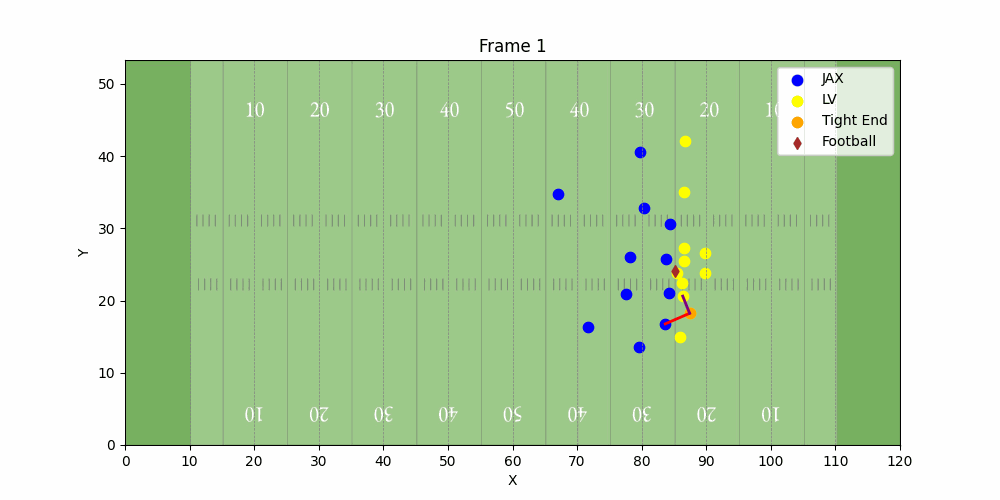

In [91]:
# Animation Visualizer
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import numpy as np
from scipy.spatial import distance
from IPython.display import display, Image


frame = 153
game_id = 2022110604
play_id = 3831

play299 = tracking_df[(tracking_df['gameId'] == game_id) 
                          & (tracking_df['playId'] == play_id)]
                        #   & (tracking_df['frameType'] == 'SNAP')]

play299_ball = tracking_df[(tracking_df['gameId'] == game_id) 
                          & (tracking_df['playId'] == play_id) 
                          & (tracking_df['frameId'] == frame) 
                          & (tracking_df['club'] == 'football')]

play299 = play299.merge(players, on='displayName', how='left')

offense = play299[play299['club'] == play299[play299['position'] == 'QB']['club'].iloc[0]]

defense = play299[play299['club'] == play299[play299['position'] == 'CB']['club'].iloc[0]]

play299_offense = offense[offense['frameId'] == frame]

play299_defense = defense[defense['frameId'] == frame]

background_img = mpimg.imread('/Users/danielsoriano/Downloads/nfl-big-data-bowl-2025/football_field.jpg')

target_positions = {'TE': 1}

gif_frames = []

for frame_id in sorted(play299['frameId'].unique()):
    frame_data = play299[play299['frameId'] == frame_id]
    
    clubs = frame_data['club'].unique()
    clubs = [club for club in clubs if club != 'football'][:2]
    
    off_players_frame = frame_data[frame_data['club'] == clubs[0]]
    def_players = frame_data[frame_data['club'] == clubs[1]]

    # def_players = def_players_frame.merge(players, on='displayName')
    off_targets = off_players_frame[off_players_frame['position'].isin(target_positions.keys())]

    off_target_data = []
    for position, count in target_positions.items():
        position_players = off_targets[off_targets['position'] == position]
        off_target_data.append(position_players.head(count))
    off_target_data = pd.concat(off_target_data)

    tightend_data = frame_data[frame_data['position'] == 'TE']

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 53.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Frame {frame_id}')
    ax.imshow(background_img, extent=[0, 120, 0, 53.3], aspect='auto', alpha=0.9)

    ax.set_xticks(range(0, 121, 10))  
    ax.grid(color='gray', linestyle='--', linewidth=0.5, axis = 'x')  
    
    ax.scatter(frame_data[frame_data['club'] == clubs[1]]['x'], 
               frame_data[frame_data['club'] == clubs[1]]['y'], 
               color='blue', s=55, label=clubs[1])
    ax.scatter(frame_data[frame_data['club'] == clubs[0]]['x'], 
               frame_data[frame_data['club'] == clubs[0]]['y'], 
               color='yellow', s=55, label=clubs[0])
    ax.scatter(tightend_data['x'], tightend_data['y'], 
               color='orange', s=55, label='Tight End')
    ax.scatter(frame_data[frame_data['club'] == 'football']['x'], 
               frame_data[frame_data['club'] == 'football']['y'], 
               color='brown', s=35, label='Football', marker='d')

    for _, off_player in off_target_data.iterrows():
        distances = def_players.apply(
            lambda def_player: distance.euclidean(
            (off_player['x'], off_player['y']),
            (def_player['x'], def_player['y'])
        ),
        axis=1
    )
    closest_def_index = distances.idxmin()
    closest_def_player = def_players.loc[closest_def_index]

    teammate_distances = off_players_frame[off_players_frame.index != off_player.name].apply(
        lambda teammate: distance.euclidean(
            (off_player['x'], off_player['y']),
            (teammate['x'], teammate['y'])
        ),
        axis=1
    )
    closest_teammate_index = teammate_distances.idxmin()
    closest_teammate = off_players_frame.loc[closest_teammate_index]

    ax.plot(
        [off_player['x'], closest_def_player['x']], 
        [off_player['y'], closest_def_player['y']], 
        color='red', linewidth=2
    )

    ax.plot(
        [off_player['x'], closest_teammate['x']], 
        [off_player['y'], closest_teammate['y']], 
        color='purple', linewidth=2
    )

    ax.legend(loc='upper right')

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    gif_frames.append(image)
    plt.close(fig)

gif_path = 'players_positions_with_background.gif'
imageio.mimsave(gif_path, gif_frames, duration=0.1)

display(Image(filename=gif_path))